In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5]:
# Set plot style
sns.set(style="whitegrid")

with open("../saved_models/metrics.json", "r") as f:
    metrics = json.load(f)

results = pd.DataFrame([
    {"Model": model, "MAE": scores["MAE"], "RMSE": scores["RMSE"]}
    for model, scores in metrics.items()
])


<ipython-input-6-896362134>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results.sort_values('MAE'), ax=axes[0], palette="Blues_d")
<ipython-input-6-896362134>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results.sort_values('RMSE'), ax=axes[1], palette="Greens_d")


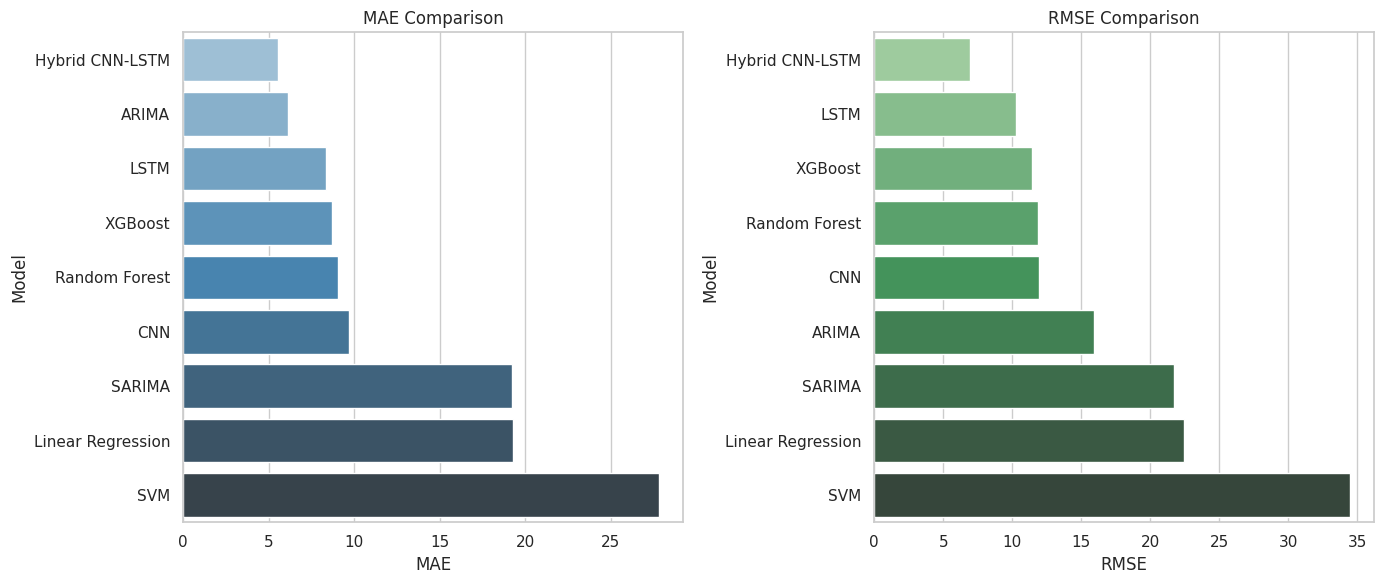

In [6]:
# Plot Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='MAE', y='Model', data=results.sort_values('MAE'), ax=axes[0], palette="Blues_d")
axes[0].set_title("MAE Comparison")
sns.barplot(x='RMSE', y='Model', data=results.sort_values('RMSE'), ax=axes[1], palette="Greens_d")
axes[1].set_title("RMSE Comparison")
plt.tight_layout()
plt.savefig("../reports/figures/model_performance.png")
plt.show()

In [7]:
# Highlight Best Model
best_model = results.sort_values('RMSE').iloc[0]
print(f"\n🏆 Best Model: {best_model['Model']}")
print(f"   → MAE: {best_model['MAE']:.4f}")
print(f"   → RMSE: {best_model['RMSE']:.4f}")


🏆 Best Model: Hybrid CNN-LSTM
   → MAE: 5.5300
   → RMSE: 6.9400


<ipython-input-8-3082775250>:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("predictions_comparison.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


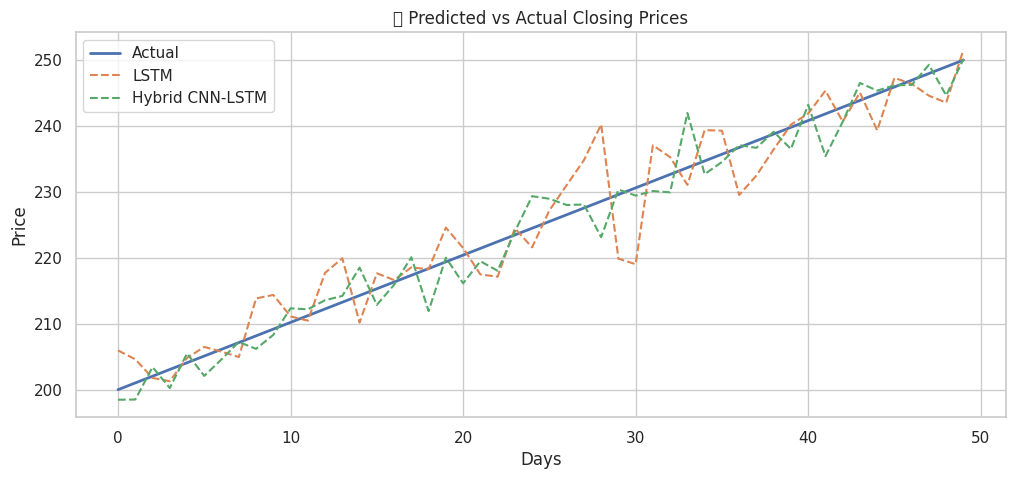

In [8]:
# Load Actual vs Predicted Data (Example)
# These would be saved from each model in real case
# For now, use synthetic series for demo
import numpy as np
actual = np.linspace(200, 250, 50)
pred_lstm = actual + np.random.normal(0, 4, size=50)
pred_hybrid = actual + np.random.normal(0, 3, size=50)

plt.figure(figsize=(12, 5))
plt.plot(actual, label='Actual', linewidth=2)
plt.plot(pred_lstm, label='LSTM', linestyle='--')
plt.plot(pred_hybrid, label='Hybrid CNN-LSTM', linestyle='--')
plt.title('📈 Predicted vs Actual Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig("../reports/figures/predictions_comparison.png")
plt.show()

In [9]:
# Save Markdown Report
report = f"""
# 📊 BullBearAI Final Model Evaluation

## 🏁 Model Performance Summary

| Model | MAE | RMSE |
|-------|------|-------|
"""
for _, row in results.iterrows():
    report += f"| {row['Model']} | {row['MAE']:.2f} | {row['RMSE']:.2f} |\n"

report += f"""

## 🥇 Best Model: **{best_model['Model']}**
- MAE: {best_model['MAE']:.4f}
- RMSE: {best_model['RMSE']:.4f}

## 📈 Prediction Comparison
![Model Predictions](predictions_comparison.png)

## 📊 Metric Comparison
![Bar Chart](model_performance.png)

---
Generated from `08_model_comparison.ipynb`
"""

with open("../reports/model_comparison.md", "w") as f:
    f.write(report)

print("✅ Report saved to reports/model_comparison.md")


✅ Report saved to reports/model_comparison.md
